In [1]:
import json
import pandas as pd

# Load JSON file
with open('amazon_one_plus_reviews.json', 'r') as file:
    data = json.load(file)

# Create DataFrames for each product
product_dataframes = {}

# Extract data for each product
for entry in data:
    product_name = entry['product'].split('-')[0].strip()  # Extract essential part of the product name
    if product_name not in product_dataframes:
        product_dataframes[product_name] = []
    
    review_date = entry['reviewed_at']
    review_text = entry['review_text']

    product_dataframes[product_name].append({
        'date': review_date,
        'text': review_text
    })

# Create DataFrames and store them with product names
for product, data in product_dataframes.items():
    df = pd.DataFrame(data)
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
    product_dataframes[product] = df

# Create DataFrames for each company
company_X_comments = product_dataframes.get('OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)', pd.DataFrame())
company_Y_comments = product_dataframes.get('Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())
company_Z_comments = product_dataframes.get('Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())

# Display the DataFrames
print("DataFrame for company_X_comments:")
print(company_X_comments.head())
print()

print("DataFrame for company_Y_comments:")
print(company_Y_comments.head())
print()

print("DataFrame for company_Z_comments:")
print(company_Z_comments.head())
print()

DataFrame for company_X_comments:
         date                                               text
0  2020-08-04  \n  Yea..pre-ordered on 28 July, got it on 4 A...
1  2020-08-03  \n  Got it delivered yesterday , used for abou...
2  2020-08-04                              \n  An amazing phone!
3  2020-08-02                                    \n  Brilliant..
4  2020-08-04  \n  I was skeptical about changing from One pl...

DataFrame for company_Y_comments:
         date                                               text
0  2020-03-21  \n  Beauty and the beast combination with snap...
1  2020-03-22  \n  Super camera, battery, sound amazing  very...
2  2020-03-21  \n  Excellent. Nice phone. Thanks to Amazon fi...
3  2020-03-21                                         \n  Pros -
4  2020-03-21  \n  Superb phone. Awesome camera, battery, pro...

DataFrame for company_Z_comments:
         date                                               text
0  2019-11-06  \n  Febulas performance Redmi Note 8

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vk768\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


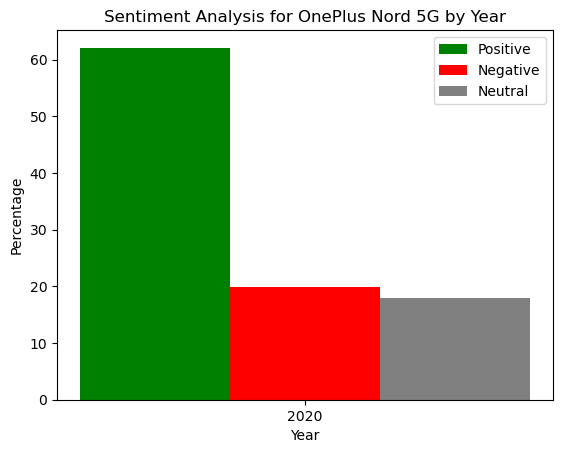

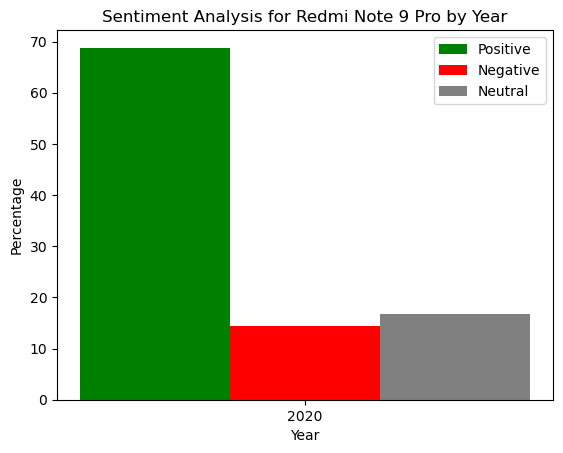

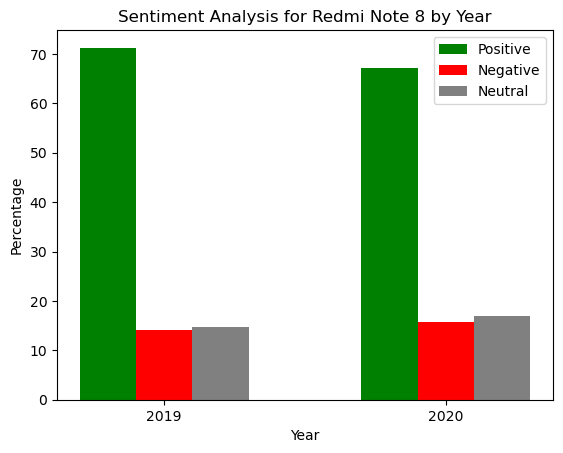

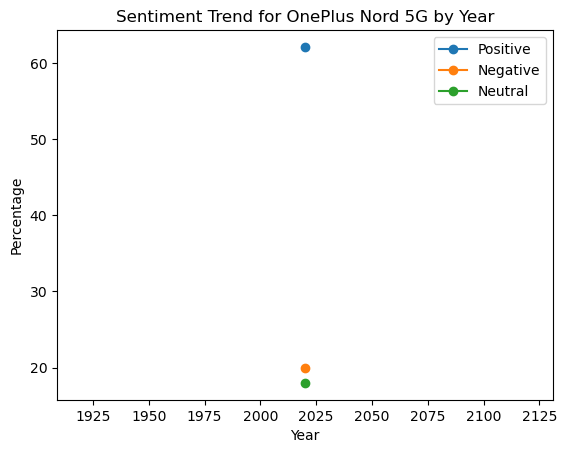

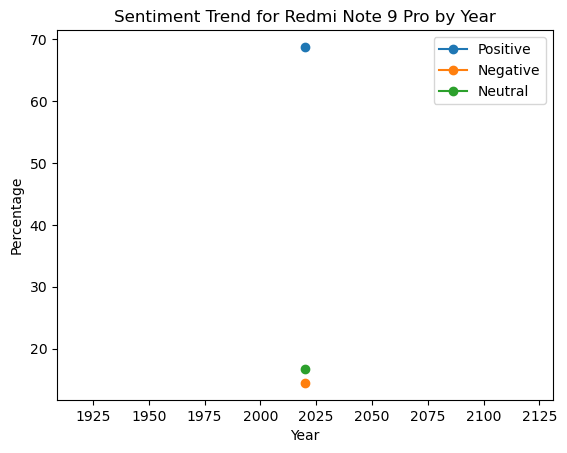

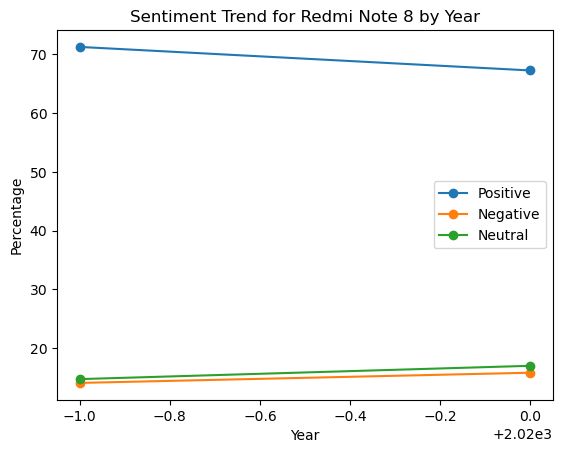

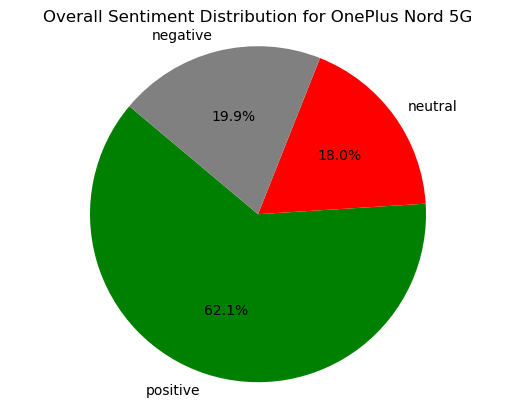

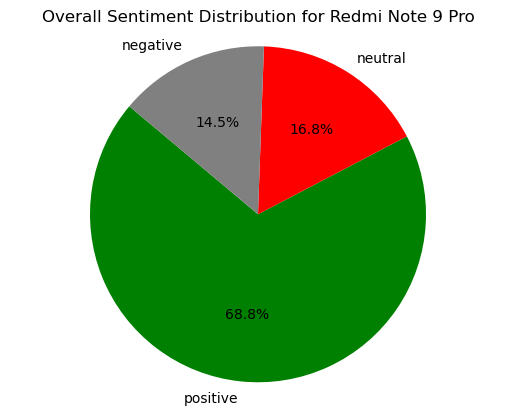

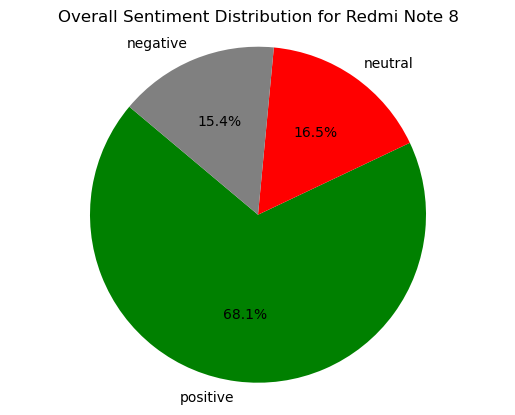

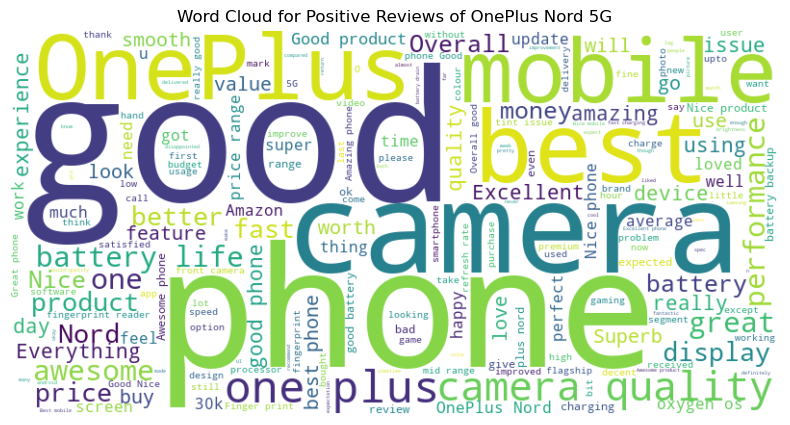

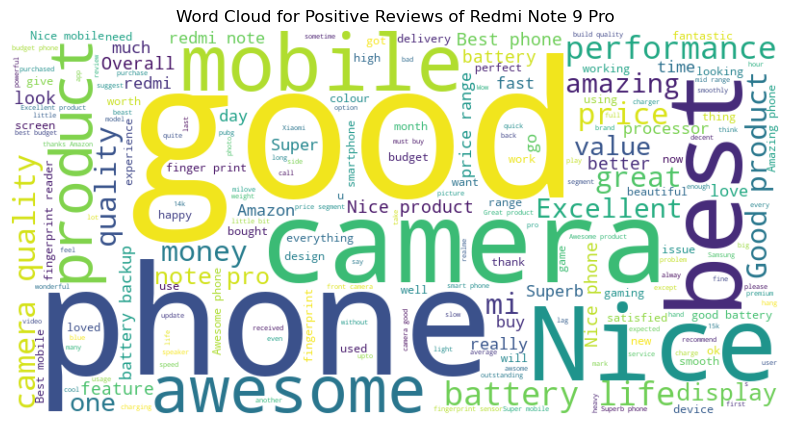

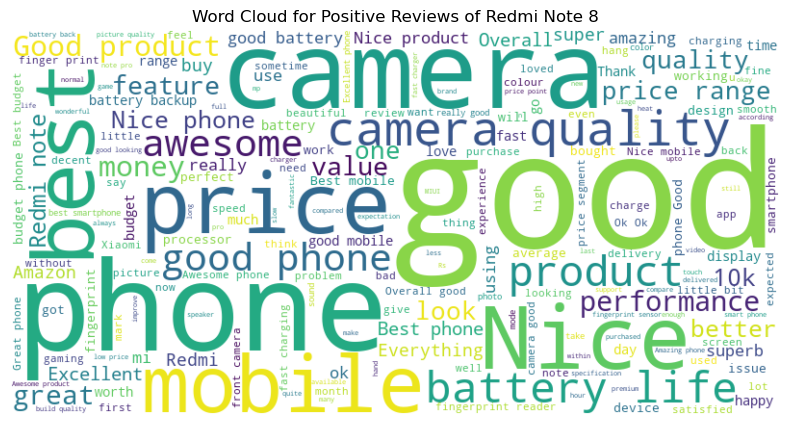

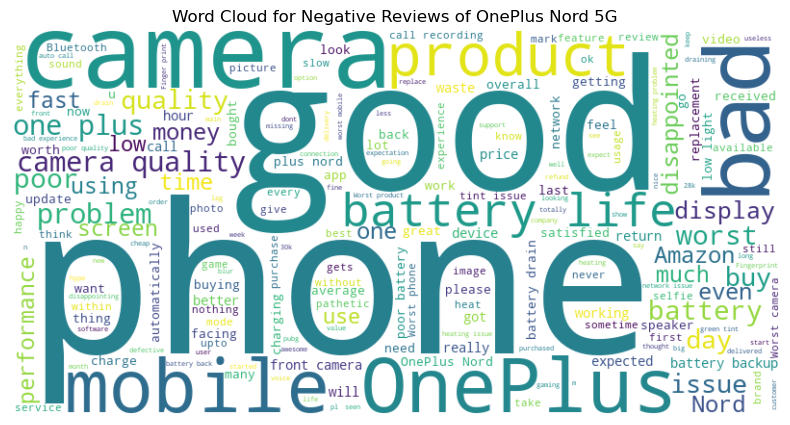

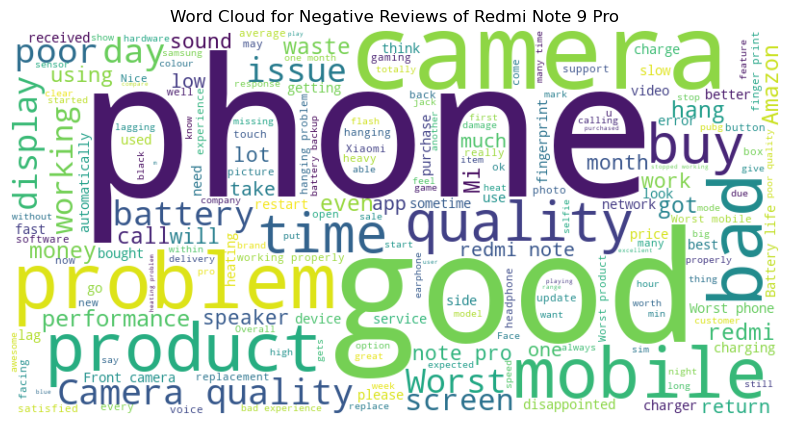

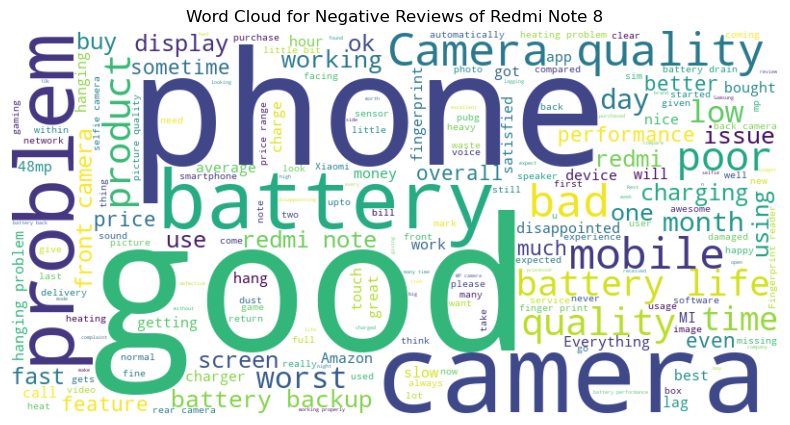

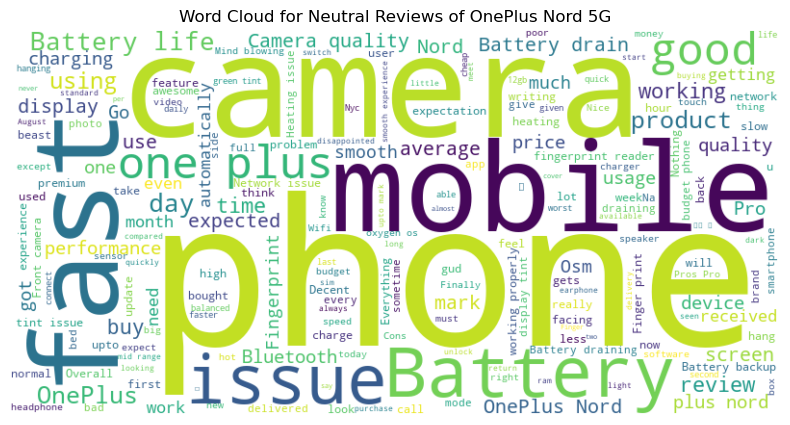

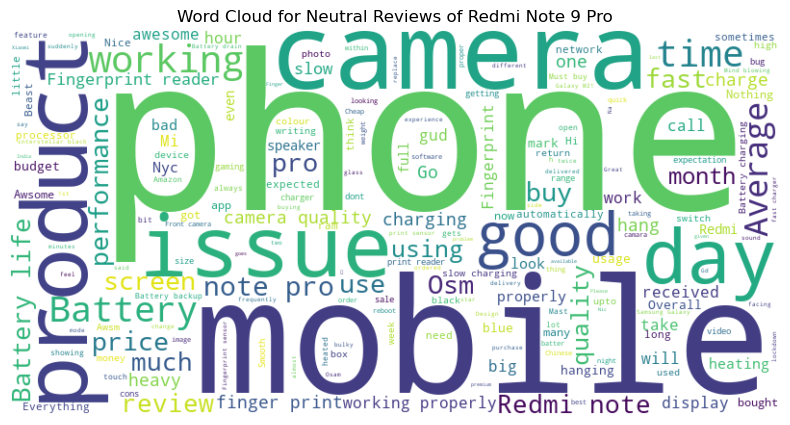

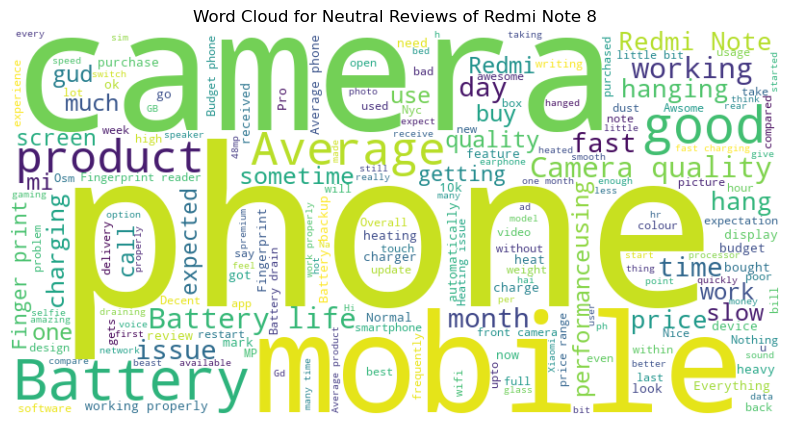

In [5]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import json
from wordcloud import WordCloud

# Download NLTK resources
nltk.download('vader_lexicon')

# Load JSON file
with open('amazon_one_plus_reviews.json', 'r') as file:
    data = json.load(file)

# Create DataFrames for each product
product_dataframes = {}

# Extract data for each product
for entry in data:
    product_name = entry['product'].split('-')[0].strip()  # Extract essential part of the product name
    if product_name not in product_dataframes:
        product_dataframes[product_name] = []
    
    review_date = entry['reviewed_at']
    review_text = entry['review_text']

    product_dataframes[product_name].append({
        'date': review_date,
        'text': review_text
    })

# Create DataFrames and store them with product names
for product, data in product_dataframes.items():
    df = pd.DataFrame(data)
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
    product_dataframes[product] = df

# Create DataFrames for each company
company_X_comments = product_dataframes.get('OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)', pd.DataFrame())
company_Y_comments = product_dataframes.get('Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())
company_Z_comments = product_dataframes.get('Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())

# Convert DataFrame to list of dictionaries for each company
company_X_comments = [
    {"date": date, "text": text} for date, text in zip(company_X_comments['date'], company_X_comments['text'])
]
company_Y_comments = [
    {"date": date, "text": text} for date, text in zip(company_Y_comments['date'], company_Y_comments['text'])
]
company_Z_comments = [
    {"date": date, "text": text} for date, text in zip(company_Z_comments['date'], company_Z_comments['text'])
]

# Function to perform sentiment analysis using VADER
def analyze_sentiment_vader(comment):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(comment)
    return scores['compound']

# Function to extract year from date string
def extract_year(date_str):
    try:
        datetime_obj = datetime.strptime(date_str, "%Y-%m-%d")
        return datetime_obj.year
    except ValueError:
        print("Error: Invalid date string:", date_str)
        return None

# Function to classify sentiment based on VADER score
def classify_sentiment(score):
    POSITIVE_THRESHOLD = 0.05
    NEGATIVE_THRESHOLD = -0.05
    if score >= POSITIVE_THRESHOLD:
        return 'positive'
    elif score <= NEGATIVE_THRESHOLD:
        return 'negative'
    else:
        return 'neutral'

# Function to calculate sentiment percentages
def calculate_sentiment_percentages(comments):
    # Classify comments by year
    comments_by_year = {}
    for comment in comments:
        year = extract_year(comment["date"])
        if year is not None:  # Exclude None values
            if year not in comments_by_year:
                comments_by_year[year] = []
            comments_by_year[year].append(comment["text"])

    # Now we apply the sentiment analysis to each year's comments
    sentiments_by_year = {}
    for year, comments_list in comments_by_year.items():
        sentiments = [analyze_sentiment_vader(comment) for comment in comments_list]
        sentiments_by_year[year] = sentiments

    # Calculate sentiment percentages
    sentiment_percentages_by_year = {}
    for year, sentiments in sentiments_by_year.items():
        classified_sentiments = [classify_sentiment(score) for score in sentiments]
        sentiment_counts = Counter(classified_sentiments)
        total = len(sentiments)
        percentages = {sentiment: (count/total) * 100 for sentiment, count in sentiment_counts.items()}
        sentiment_percentages_by_year[year] = percentages

    return sentiment_percentages_by_year

# Function to plot sentiment analysis as bar chart
def plot_sentiment_analysis(sentiment_percentages, company_name):
    years = sorted(sentiment_percentages.keys())
    categories = ['positive', 'negative', 'neutral']

    fig, ax = plt.subplots()
    bar_width = 0.2  # Width of the bars
    index = np.arange(len(years))

    for i, category in enumerate(categories):
        data = [sentiment_percentages[year].get(category, 0) for year in years]
        ax.bar(index + i * bar_width, data, bar_width, label=category.capitalize(),
               color=['green', 'red', 'gray'][i])

    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Sentiment Analysis for {company_name} by Year')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(years)
    ax.legend()

    plt.show()

# Function to plot sentiment analysis as line chart
def plot_sentiment_line(sentiment_percentages, company_name):
    years = sorted(sentiment_percentages.keys())
    categories = ['positive', 'negative', 'neutral']
    
    fig, ax = plt.subplots()
    
    for category in categories:
        data = [sentiment_percentages[year].get(category, 0) for year in years]
        ax.plot(years, data, marker='o', label=category.capitalize())
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Sentiment Trend for {company_name} by Year')
    ax.legend()
    
    plt.show()

# Function to plot overall sentiment distribution as pie chart
def plot_overall_sentiment_pie(comments, company_name):
    sentiments = [classify_sentiment(analyze_sentiment_vader(comment["text"])) for comment in comments]
    sentiment_counts = Counter(sentiments)
    total = len(comments)
    percentages = {sentiment: (count / total) * 100 for sentiment, count in sentiment_counts.items()}
    
    labels = percentages.keys()
    sizes = percentages.values()
    colors = ['green', 'red', 'gray']
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')
    ax.set_title(f'Overall Sentiment Distribution for {company_name}')
    
    plt.show()

# Function to generate word cloud for each sentiment
def plot_word_cloud(comments, sentiment, company_name):
    filtered_comments = [comment["text"] for comment in comments if classify_sentiment(analyze_sentiment_vader(comment["text"])) == sentiment]
    text = " ".join(filtered_comments)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Reviews of {company_name}')
    plt.show()

# Calculate sentiment percentages for each company
sentiment_percentages_X = calculate_sentiment_percentages(company_X_comments)
sentiment_percentages_Y = calculate_sentiment_percentages(company_Y_comments)
sentiment_percentages_Z = calculate_sentiment_percentages(company_Z_comments)

# Plot sentiment analysis for each company using bar chart
plot_sentiment_analysis(sentiment_percentages_X, "OnePlus Nord 5G")
plot_sentiment_analysis(sentiment_percentages_Y, "Redmi Note 9 Pro")
plot_sentiment_analysis(sentiment_percentages_Z, "Redmi Note 8")

# Plot sentiment trend for each company using line chart
plot_sentiment_line(sentiment_percentages_X, "OnePlus Nord 5G")
plot_sentiment_line(sentiment_percentages_Y, "Redmi Note 9 Pro")
plot_sentiment_line(sentiment_percentages_Z, "Redmi Note 8")

# Plot overall sentiment distribution for each company using pie chart
plot_overall_sentiment_pie(company_X_comments, "OnePlus Nord 5G")
plot_overall_sentiment_pie(company_Y_comments, "Redmi Note 9 Pro")
plot_overall_sentiment_pie(company_Z_comments, "Redmi Note 8")

# Plot word cloud for each sentiment for each company
for sentiment in ['positive', 'negative', 'neutral']:
    plot_word_cloud(company_X_comments, sentiment, "OnePlus Nord 5G")
    plot_word_cloud(company_Y_comments, sentiment, "Redmi Note 9 Pro")
    plot_word_cloud(company_Z_comments, sentiment, "Redmi Note 8")
